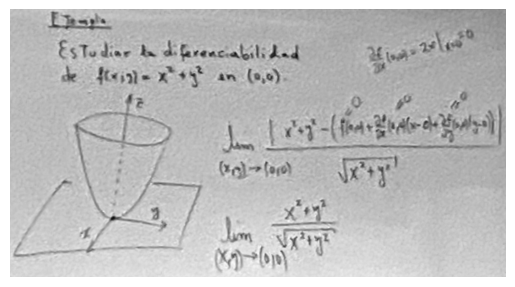

In [486]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_image = mpimg.imread('imagen2.png')

image = np.dot(original_image[..., :3], [0.2989, 0.5870, 0.1140])

plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

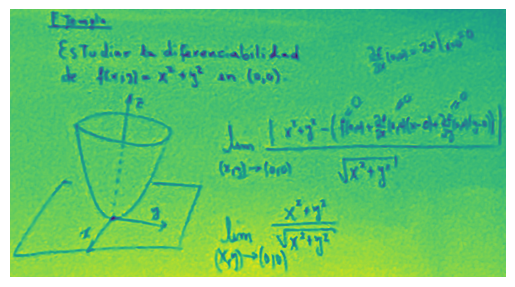

In [487]:
plt.imshow(image)
plt.axis("off")
plt.show()

In [488]:
size = width, height = image.shape
print(image.shape)

(1281, 2375)


In [489]:
print(f'max: {image.max()}')
print(f'min: {image.min()}')

max: 0.7020557040274142
min: 0.06404510086253284


In [490]:
# calcular mayor diferencia entre valores de una fila o columna
def diferencia(matriz, axis, index, start=0, end=None):
    
    if axis == 0:
        if end == None:
            arreglo = matriz[index, start:]
        else:
            arreglo = matriz[index, start:end]
    elif axis == 1:
        if end == None:
            arreglo = matriz[start:, index]
        else:
            arreglo = matriz[start:end, index]
    else:
        raise ValueError("El valor de 'axis' debe ser 0 para filas o 1 para columnas")
    
    return abs(np.diff(arreglo)).max()

In [491]:
# valor más repetido
def mas_repetido(image, option=None, delta=None):   # option: 'min' | 'max'
    minimo = image.min()
    maximo = image.max()
    
    if option == None:
        valores, conteos = np.unique(image, return_counts=True)
        rep = valores[np.argmax(conteos)]
        return rep
    elif option == 'min':   # min: mas oscuros
        rango_min = minimo + delta
        rango = image[(image >= minimo) & (image <= rango_min)]
        valores, conteos = np.unique(rango, return_counts=True)
        rep = valores[np.argmax(conteos)]
        return rep
    elif option == 'max':   # min: mas claros
        rango_max = maximo - delta
        rango = image[(image <= maximo) & (image >= rango_max)]
        valores, conteos = np.unique(rango, return_counts=True)
        rep = valores[np.argmax(conteos)]
        return rep

In [492]:
mas_repetido(image, 'max', 0.1)

0.6042443339109421

In [493]:
# Detectar si es similar a rep
def rep_to_color(valor, rep, delta):
    if abs(valor - rep) <= delta: return True
    else: return False

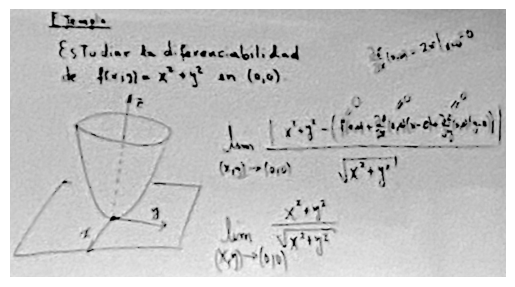

In [494]:
# cambiar color mas oscuro mas repetido (fondo) a negro
rep = mas_repetido(image, 'min', 0.15)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if rep_to_color(image[i, j], rep, 0.15):
            image[i, j] = 0
            
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

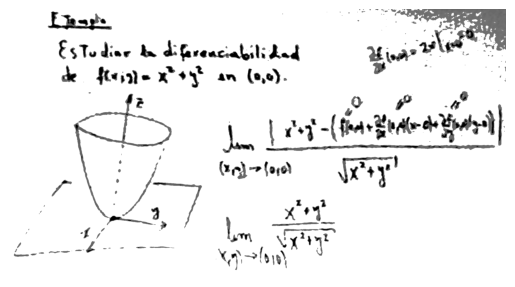

In [495]:
# cambiar color mas claro mas repetido (fondo) a blanco
rep = mas_repetido(image, 'max', 0.1)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if rep_to_color(image[i, j], rep, 0.15):
            image[i, j] = 1
            
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

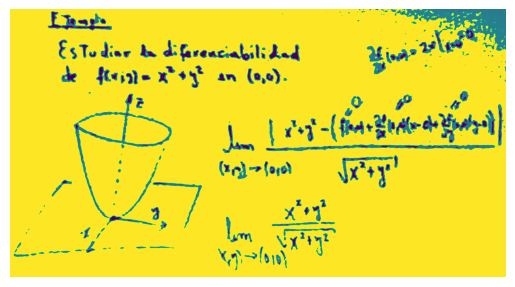

In [496]:
plt.imshow(image)
plt.axis("off")
plt.show()